<a href="https://colab.research.google.com/github/ShahabZada/learningPytorch/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
torch.manual_seed(1)
dshape=(1,1)
x=torch.rand(1,100)
w=torch.rand(dshape, requires_grad=True)
for i in range(1000):
  y_pred=x*w

print(x)
print(w)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971, 0.7544, 0.5695,
         0.4388, 0.6387, 0.5247, 0.6826, 0.3051, 0.4635, 0.4550, 0.5725, 0.4980,
         0.9371, 0.6556, 0.3138, 0.1980, 0.4162, 0.2843, 0.3398, 0.5239, 0.7981,
         0.7718, 0.0112, 0.8100, 0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588,
         0.9391, 0.4167, 0.7140, 0.2676, 0.9906, 0.2885, 0.8750, 0.5059, 0.2366,
         0.7570, 0.2346, 0.6471, 0.3556, 0.4452, 0.0193, 0.2616, 0.7713, 0.3785,
         0.9980, 0.9008, 0.4766, 0.1663, 0.8045, 0.6552, 0.1768, 0.8248, 0.8036,
         0.9434, 0.2197, 0.4177, 0.4903, 0.5730, 0.1205, 0.1452, 0.7720, 0.3828,
         0.7442, 0.5285, 0.6642, 0.6099, 0.6818, 0.7479, 0.0369, 0.7517, 0.1484,
         0.1227, 0.5304, 0.4148, 0.7937, 0.2104, 0.0555, 0.8639, 0.4259, 0.7812,
         0.6607, 0.1251, 0.6004, 0.6201, 0.1652, 0.2628, 0.6705, 0.5896, 0.2873,
         0.3486]])
tensor([[0.9579]], requires_grad=True)


In [ ]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")


# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights

a = torch.randn((), device=device, dtype=dtype)



learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a * x

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of b with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x).sum()
    

    # Update weights using gradient descent
    
    a -= learning_rate * grad_a
    

print(f'Result: y =  {a.item()} x ')

99 395.1315002441406
199 392.95391845703125
299 392.8004150390625
399 392.78955078125
499 392.7887878417969
599 392.78875732421875
699 392.7887268066406
799 392.7886962890625
899 392.7887268066406
999 392.7887268066406
1099 392.7887268066406
1199 392.7887268066406
1299 392.7887268066406
1399 392.7887268066406
1499 392.7887268066406
1599 392.7887268066406
1699 392.7887268066406
1799 392.7887268066406
1899 392.7887268066406
1999 392.7887268066406
Result: y =  0.3035065233707428 x 


In [3]:
#linear function in pytorch from scratch

import torch

# f = w * x 
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype = torch.float32)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)
def gradient(x, y, y_pred):
    return torch.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [4]:
#linear function in pytorch using autograd
import torch

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [18]:
import torch
mse_loss = torch.nn.MSELoss()
X=torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y=torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
#model output
def forward(x):
  return w*x

#loss
def loss(y, y_pred):
  return mse_loss(y, y_pred)

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

#training
learning_rate = 0.01
n_iters=1000

for epoch in range(n_iters):
  #forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients calculation
  l.backward()

  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  #zero the gradients after updating
  w.grad.zero_()


  if epoch % 100 ==0:
    print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
    
print(f'Prediction after training = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 101: w = 2.000, loss = 0.00000000
epoch 201: w = 2.000, loss = 0.00000000
epoch 301: w = 2.000, loss = 0.00000000
epoch 401: w = 2.000, loss = 0.00000000
epoch 501: w = 2.000, loss = 0.00000000
epoch 601: w = 2.000, loss = 0.00000000
epoch 701: w = 2.000, loss = 0.00000000
epoch 801: w = 2.000, loss = 0.00000000
epoch 901: w = 2.000, loss = 0.00000000
Prediction after training = 10.000


In [16]:
#using pytorch builtin loss function and optimizer
###
#1) design model (input, output size, forward pass)
#2) construct loss and optimizer
#3) training loop
#      forward pass -compute prediction
#      backward pass -gradients
#      update weights
import torch
import torch.nn as nn

X=torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y=torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
#model output
def forward(x):
  return w*x


print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

#training
learning_rate = 0.01
n_iters=1000

loss = nn.MSELoss()
optimizer= torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
  #forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients calculation
  l.backward()

  #update weights
  optimizer.step()

  #zero the gradients after updating
  optimizer.zero_grad()


  if epoch % 100 ==0:
    print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
    
print(f'Prediction after training = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 101: w = 2.000, loss = 0.00000000
epoch 201: w = 2.000, loss = 0.00000000
epoch 301: w = 2.000, loss = 0.00000000
epoch 401: w = 2.000, loss = 0.00000000
epoch 501: w = 2.000, loss = 0.00000000
epoch 601: w = 2.000, loss = 0.00000000
epoch 701: w = 2.000, loss = 0.00000000
epoch 801: w = 2.000, loss = 0.00000000
epoch 901: w = 2.000, loss = 0.00000000
Prediction after training = 10.000


epoch: 10, loss = 3979.0012
epoch: 20, loss = 2806.3831
epoch: 30, loss = 2006.8636
epoch: 40, loss = 1461.6179
epoch: 50, loss = 1089.7017
epoch: 60, loss = 835.9637
epoch: 70, loss = 662.8187
epoch: 80, loss = 544.6459
epoch: 90, loss = 463.9770
epoch: 100, loss = 408.8992


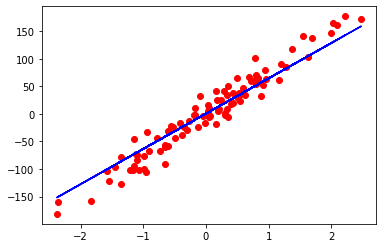

In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [26]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

#1) Model
#Linear model f=wx+b , sigmoid at end
class LogesticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogesticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogesticRegression(n_features)


#2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss() #binary crossentropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#3)training loop
num_epochs = 10000
for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  #backward pass 
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if(epoch+1)%1000==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')   



epoch: 1000, loss = 0.0875
epoch: 2000, loss = 0.0681
epoch: 3000, loss = 0.0593
epoch: 4000, loss = 0.0539
epoch: 5000, loss = 0.0502
epoch: 6000, loss = 0.0474
epoch: 7000, loss = 0.0452
epoch: 8000, loss = 0.0433
epoch: 9000, loss = 0.0418
epoch: 10000, loss = 0.0405
accuracy = 0.9649
